In [1]:
import matplotlib.pyplot as plt
import numpy as np
import h5py

In [2]:
f = h5py.File('/Users/ahyeon/Desktop/activ misc/optimize_k_mat.h5', 'r')
f2 = h5py.File('/Users/ahyeon/Desktop/activ/results/optimize_k_mat_0.2_20.h5')
bm_f = h5py.File('/Users/ahyeon/Desktop/activ/notebooks/optimize_k_mat_bm_prac.h5')

In [3]:
list(bm_f.keys())

['eps', 'error', 'k', 'minsamples']

In [14]:
error = bm_f['error'][:]
eps = bm_f['eps'][:]
minsamples = bm_f['minsamples'][:]
k = bm_f['k'][:]

In [10]:
k.shape

(7, 12, 10)

In [15]:
k = np.median(k, axis=2)

In [19]:
k

array([[1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ],
       [2. , 2. , 2. , 2. , 2. , 2. , 2. , 2. , 2. , 2. , 1. , 1. ],
       [5.5, 5. , 3. , 3. , 2.5, 2. , 2. , 2. , 2. , 2. , 2. , 2. ],
       [7. , 6. , 6. , 5. , 4.5, 5. , 4.5, 3. , 3.5, 3. , 2.5, 2. ],
       [8.5, 6. , 5. , 6. , 4.5, 5. , 4.5, 5. , 4.5, 4. , 4. , 4. ],
       [5.5, 4.5, 4.5, 4. , 4. , 4. , 4. , 3.5, 3. , 3.5, 3.5, 4. ],
       [2.5, 3. , 2.5, 2. , 2. , 2. , 2. , 2. , 2. , 2. , 2. , 2. ]])

(<matplotlib.image.AxesImage at 0x113c58438>,
 <matplotlib.colorbar.Colorbar at 0x113c7fe10>)

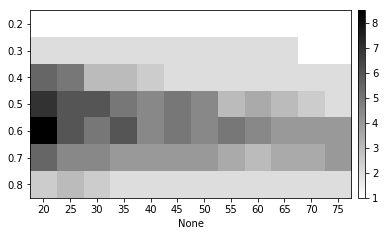

In [21]:
from activ.analytics import heatmap
#plt.matshow(k, cmap='gray_r')
heatmap(k, eps, minsamples)

In [58]:
k_mat = bm_f['k'][:]
k_mat.shape

(7, 12, 10)

In [59]:
error_mat = error.mean(axis=2)
np.min(error_mat)
# np.max(error_mat)

16.953544369485474

In [60]:
np.argmin(error_mat, axis=1)

array([ 1,  0,  1,  0,  7, 11, 10])

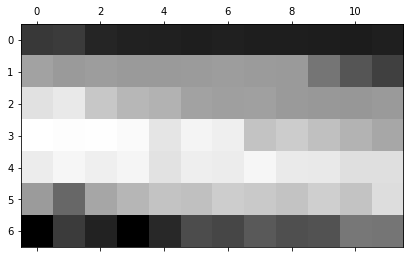

In [63]:
plt.matshow(error_mat, cmap='gray_r')

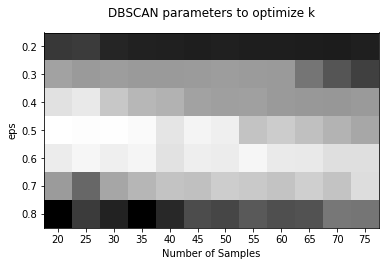

In [62]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(error_mat, cmap='gray_r')


ax.set_xticks(np.arange(0,12))
ax.set_xticklabels(xticks2)
ax.set_yticks(np.arange(0,7))
ax.set_yticklabels(yticks2)
ax.set_xlabel('Number of Samples')
ax.set_ylabel('eps')
ax.xaxis.set_ticks_position('bottom')
ax.set_title('DBSCAN parameters to optimize k')
plt.savefig('/Users/ahyeon/Desktop/activ misc/dbscan_param_to_optimize_k_bm.pdf')
plt.show()


In [35]:
xticks2 = list(map(str, np.arange(20,80,5)))
yticks2 = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
yticks2

[0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]

In [29]:
xticks = list(map(str, np.arange(5,55,5)))
yticks = list(map(str, np.arange(0.1,1.1,0.1)))
yticks

['0.1',
 '0.2',
 '0.30000000000000004',
 '0.4',
 '0.5',
 '0.6',
 '0.7000000000000001',
 '0.8',
 '0.9',
 '1.0']

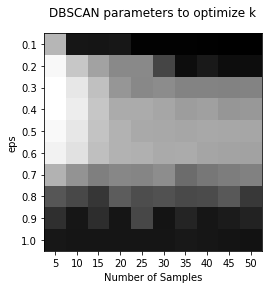

In [97]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(error_mat, cmap='gray_r')

ax.set_xticks(np.arange(0,10))
ax.set_xticklabels(xticks)
ax.set_yticks(np.arange(0,10))
ax.set_yticklabels(yticks)
ax.set_xlabel('Number of Samples')
ax.set_ylabel('eps')
ax.xaxis.set_ticks_position('bottom')
ax.set_title('DBSCAN parameters to optimize k')
# plt.savefig('/Users/ahyeon/Desktop/activ misc/dbscan_param_to_optimize_k.pdf')
plt.show()


In [21]:
minval_idx = np.unravel_index(np.argmin(error_mat), error_mat.shape)